# Policy and Value Iteration Instructions

## Overview

Welcome to Assignment 2! In this part of the assignment, you will be exploring some of the fundamental concepts in reinforcement learning. In this notebook, you will learn about value and policy iteration and implement them in order to navigate the GridWorld environment while in the second notebook (Part B), you will implement the tabular Q-learning algorithm to navigate the TextWorld environment (from A1).

## What is a Markov Decision Process (MDP)?
An MDP is a widely used framework to model decision-making in a stochastic environment. In RL, they are used to model the interaction between an agent and the environment it's in.

### Components of an MDP

An MDP has four key components and can be written as follows $\mathcal{M} = \{\mathcal{S}, \mathcal{A}, \mathcal{T}, \mathcal{R}\}$.

$\mathcal{S}$ and $\mathcal{A}$ are the set of possible states and actions respectively.

$\mathcal{T}$ is the transition function (or transition dynamics). For example $\mathcal{T}(s, a, s')$ gives the probability that taking action $a$ in state $s$ will land the agent in state $s'$. This expression can alternatively be written as $P(s'|s,a)$.

Finally, $R$ is the reward function. $\mathcal{R}(s, a, s')$ will output a scalar reward for taking action $a$ at a  state $s$. Note that sometimes, the reward might only depend on the state the agent is in or the state it reaches and can then be defined as $\mathcal{R}(s)$ or $\mathcal{R}(s')$. Note that GridWorld uses the $\mathcal{R}(s')$ definition which will simplify policy extraction. Replace the reward function definition as appropriate in the equations below.

Different definitions of an MDP may also include a start state, one or more goal states, a discount factor $γ$, or a time horizon.

### Markov Property

By modeling an interaction as an MDP, we assume the following key property: ***The next state of the system only depends on the current state and the action taken.*** This means that the sequence of states and actions that lead up to the current state is totally irrelevant to the environment's dynamics in the current state. This property is clearly illustrated by the definitions of the transition and reward functions. Notice that both only depend on the current state, action taken, and next state, not on the history of states.

### Solving an MDP

A policy is simply a function $ \pi: \mathcal{S} ⇒ \mathcal{A}$. For the given MDP, we want to find the optimal policy $\pi^*$ that maximizes utility (sum of discounted rewards). You will implement a few different ways to extract $\pi^*$ for the given environments.


## The Bellman Equations

### Basic Definitions
1. $V^\pi(s)$, gives the expected utility of $s$ under policy $\pi$
2. $Q^\pi(s, a)$, gives the utility of $s$ under policy $\pi$ after first taking action $a$, then following $\pi$.

### Relating $V^\pi$ and $Q^\pi$
For any policy $\pi$,
1. $V^\pi(s) = \sum_{a \in \mathcal{A}} \pi(a|s)Q^\pi(s, a)$, the average of Q-values weighted by the probability of the action given to the policy
2. $Q^\pi(s, a) = \sum_{s'}\mathcal{T}(s, a, s')[\mathcal{R}(s, a, s') + \gamma V^\pi(s')]$, the average of the sum of the next state values once discounted and the reward, weighted by the probability of the next state given the action

### Bellman Equations for the Optimal Policy
For an optimal policy $\pi^*$,
1. $V^*(s) = \max_aQ^*(s, a)$
2. $Q^*(s, a) = \sum_{s'}\mathcal{T}(s, a, s')[\mathcal{R}(s, a, s') + \gamma V^*(s')]$

Notice that while the function for $Q^*$ does not change, $V^*$ can be simplified as the optimal policy will always take the action with the maximum $Q$-value.

### Relating $V^*$ to itself

By subbing in Equation 2 into Equation 1, we get

3. $V^*(s) = \max_{a \in \mathcal{A}}\sum_{s'}\mathcal{T}(s, a, s')[\mathcal{R}(s, a, s') + \gamma V^*(s')]$











## Value Iteration

Value iteration is essentially running Equation 3 on all states repeatedly until the value function converges. It is guaranteed that this process will converge. Let us examine this in a bit more detail.

When we run expectimax on all states for the $n$th time, we have found the value function of a state with a time horizon of $n$ steps. Thus, our initial value function at time 0 is $V_0(s) = 0 $   $∀ s \in \mathcal{S}$. Each time, we run expectimax, we use a slightly reworded version of Equation 3 to update our value function as follows:

4. $V_{k+1}(s) = \max_{a \in \mathcal{A}}\sum_{s'}\mathcal{T}(s, a, s')[\mathcal{R}(s, a, s') + \gamma V_k(s')]$

How long does one iteration of this algorithm take? We have to run Equation 3 on each of $|\mathcal{S}|$ states. To compute Equation 3, we have to take the max across $|\mathcal{A}|$ actions, and for each action, we have to sum across $|\mathcal{S}|$ states. Thus, one iteration of this algorithm has $\mathcal{O}(|\mathcal{S}|^2|\mathcal{A}|)$ complexity.

To summarize, to perform one iteration of value iteration for a single state, we must:
- For each action:
    1. Compute transition dynamics to possible next states
    2. Compute reward function for possible next states
    3. Compute $\gamma$ multiplied by the values of the next states
    4. Combine the results of steps 1-3 according to Equation 3 to calculate the Q value for the action
- Find the maximum Q-value action and update the value function accordingly

### Policy Extraction

Given the value function $V$ for all possible states, how do we extract the policy. Consider Equation 4. Given a state $s$, we know that we maximized $Q^*(s, a)$ across actions to get $s$'s value, thus the optimal policy should choose the action with the highest $Q^*$ value. How can we simplify our calculations?

We start with the equation to get the optimal action for a given state.

5. $\pi^*(s) = \text{argmax}_{a \in \mathcal{A}}\sum_{s'}\mathcal{T}(s, a, s')[\mathcal{R}(s, a, s') + \gamma V_k(s')]$

Firstly, since our reward is defined as $\mathcal{R}(s')$ rather than $\mathcal{R}(s, a, s')$, we can substitute it into equation 5 and drop the term as it no longer depends on the action. While we're at it, we can drop $\gamma$ as it too does not depend on the action.

6. $\pi^*(s) = \text{argmax}_{a \in \mathcal{A}}\sum_{s'}\mathcal{T}(s, a, s')V_k(s')$

Finally, looking at the definition of the environment, we see that there is an overwhelming probability that taking action $a$ will result in the agent going in the expected direction (take a look at the way the stochasticity is introduced into the environment to prove this to yourself). Thus, $\mathcal{T}(s, a, s')$ will be extremely close to $1$ for the expected next state for the action and extremely close to $0$ for all other possible next states. Therefore, we can safely assume that taking action $a$ will result in only the expected next state and thus, drop the summation, resulting in

7. $\pi^*(s) = \text{argmax}_{a \in \mathcal{A}}V_k(s')$

where $s'$ is the expected next state given action $a$.

This equation is much simpler to implement and the one you are expected to code up in this assignment (Hint: it can be vectorized). Choose whichever action will result the agent being in the state with the highest $V^*$ value.

## Policy Iteration

Policy iteration is an alternative approach to solving MDPs which alternates between policy evaluation and policy improvement until convergence. This method is also guaranteed to converge.

There are two steps to policy iteration that are repeated until convergence.

### 1. Policy Evaluation
To evaluate the value of the current policy $\pi$, we use a similar equation to what we have seen before.

8. $V^\pi(s) = \sum_{s'} \mathcal{T}(s, \pi(s), s') \left[ \mathcal{R}(s, \pi(s), s') + \gamma V^\pi(s') \right]$

and iterate like in value iteration to find $V^\pi$. Note that we are using the current policy $\pi$ and not the optimal policy $\pi^*$. Notice how we are updating the value function for the state based on the action defined by the policy, not comparing Q-value for all actions we can possibly take. *Do not move onto policy improvement until your value function has converged*.

### 2. Policy Improvement

We can now use Equation 5 to update the policy since we know the optimal policy should be choosing the action with the highest $\mathcal{Q}$-value. Eventually this process will terminate as the policy will no longer be able to get better.

As an exercise, compute the time complexity of a single run of policy iteration and compare to value iteration. In what circumstances might one be better than the other?

Your task for this notebook is to implement value iteration, policy extraction, and policy iteration. Make sure to use the many helper functions provided to aid your implementation. If any of your function implementations are starting to push 30 or so lines of code, consider whether you are making full use of the provided helper functions and try to simplify your code.
After successfully completing this notebook, you will have learned two of the most fundamental algorithms used in RL and continue onto implementing Q-learning.

Happy coding!

# Installation & Imports

In [1]:
%pip install numpy
%pip install matplotlib
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# export - DO NOT MOVE OR MODIFY THIS LINE
from dataclasses import dataclass
from enum import Enum
from functools import cache
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# export - DO NOT MODIFY OR MOVE THIS LINE 
# Add any additional imports (from the Python Standard Library only) here


# GridWorld Setup

In [3]:
np.random.seed(72)

## Types of Action

The algorithms you write must support both 4-way movement (up, right, down, left) and 8 way "cardinal movement" (up, up-right, right, ...). The autograder will check to ensure your code runs on both. You can test both strategies by suppying a different `ActionMode` enum.

In [4]:
class ActionMode(Enum):
    SIMPLE = 4  # 4 directions: Up, Right, Down, Left
    CARDINAL = 8  # 8 directions: Includes diagonals

## State

Instead of using numpy arrays or Python lists, we recommend using the State object below. This will help you conceptualize about the RL part of the project better and working with pseudocode easier. If you don't know how to use a Python data class, please see [this article](https://www.dataquest.io/blog/how-to-use-python-data-classes/).

In [5]:
@dataclass
class State:
    r: int
    c: int

    def numpy(self):
        return np.array([self.r, self.c]).reshape((1, 2))

## Environment

The environment is responsible for handling all the logic around states and actions on the board. Make use of this class as much as possible as it supports all the complex logic necessary to interact with the board.

`discrete_rewards` is a board mode where taking any particular action will have a cost of -1 and a custom number of goals, obstacles, goal reward, and obtacle value can be inputted. Setting this to false turns on **continuous_rewards** mode which randomly generates rewards from -1 to 1 all across the board. Your algorithm must work on *both discrete and continuous boards*.

We strongly encourage you to construct your own boards and test your algorithm on a variety of parameters. **Your algorithm will be evaluated on boards with the following different parameters**:
1. Size of board (change `n_rows` and `n_cols`). Will always be greater than 0.
2. Action mode (`ActionMode.SIMPLE` and `ActionMode.CARDINAL`)
3. Discrete or Continuous Rewards
4. Number of Obstacles or Goals (i.e. `obstacle_count=10, goal_count=1`). Every board we test will have a non-negative number of obstacles and a non-negative number of goals.
5. Reward values for obstacles and goals (i.e. `obstacle_value=-10, goal_value=20`). Obstacle values will always be negative and goals will always be positive.

Take your time to explore the functions and read the documentation to know what everything is for. Explore the cells below to also understand the output that is possible and how to use the functions.

In [6]:
class Environment:
    def __init__(self, n_rows: int, n_cols: int, action_mode: ActionMode, discrete_rewards: bool = False, **kwargs):
        self.board = np.zeros((n_rows, n_cols)) - 1
        self.action_mode = action_mode
        self.m, self.n = n_rows, n_cols

        if discrete_rewards:
            if "obstacle_count" not in kwargs:
                raise KeyError("Did not provide `obstacle_count` when using discrete_rewards")
            if "goal_count" not in kwargs:
                raise KeyError("Did not provide `goal_count` when using discrete_rewards")
            if "obstacle_value" not in kwargs:
                raise KeyError("Did not provide `obstacle_value` when using discrete_rewards")
            if "goal_value" not in kwargs:
                raise KeyError("Did not provide `goal_value` when using discrete_rewards")
            # add -1 spots
            indices_obstacles = np.random.choice(self.board.size, size=kwargs["obstacle_count"], replace=False)
            np.put(self.board, indices_obstacles, np.take(self.board, indices_obstacles) + kwargs["obstacle_value"] + 1)

            # add to board
            indices_plus_1 = np.random.choice(self.board.size, size=kwargs["goal_count"], replace=False)
            np.put(self.board, indices_plus_1, np.take(self.board, indices_plus_1) + kwargs["goal_value"] + 1)

        else:
            self.board = np.random.uniform(-1, 1, (self.m, self.n))

        dynamics = np.random.rand(self.m, self.n, self.action_mode.value, self.action_mode.value) # T(s, a, s')

        # ensure the direction you are trying to take is always the highest
        for a in range(self.action_mode.value):
            dynamics[:, :, a, a] += 100

        # handle the borders as invalid action
        # probability of 0's
        k = None
        if self.action_mode == ActionMode.SIMPLE:
            k = 1
        elif self.action_mode == ActionMode.CARDINAL:
            k = 2
            # top right - top can't and right can't
            dynamics[0, :, :, 1] = 0
            dynamics[:, -1, :, 1] = 0

            # bottom right
            dynamics[-1, :, :, 3] = 0
            dynamics[:, -1, :, 3] = 0

            # bottom left
            dynamics[-1, :, :, 5] = 0
            dynamics[:, 0, :, 5] = 0


            # top left
            dynamics[0, :, :, 7] = 0
            dynamics[:, 0, :, 7] = 0
        else:
            raise ValueError("invalid action mode provided")
        dynamics[0, :, :, 0 * k] = 0 # top
        dynamics[:, -1, :, 1 * k] = 0 # right
        dynamics[-1, :, :, 2 * k] = 0 # bottom
        dynamics[:, 0, :, 3 * k] = 0 # left

        # Normalize the probability distributions so that each action's distribution sums to 1
        dynamics /= dynamics.sum(axis=-1, keepdims=True)
        self.dynamics = dynamics

    def get_next_state_rewards(self, state: State, action_val: int) -> np.array:
        """
        Rewards for the next possible states.

        args:
            state: State - position of the agent on the board. Coordinates represented by (r, c)
            action: int - action index the agent wants to take (reference `directions()` to check you are using the correct one)

        returns:
            np.array representing rewards for all possible VALID next states. Note, any invalid border actions
            (i.e. moving up when in the top row) will not be included in this returned array.
        """
        next_states = self.get_next_states(state, action_val)
        rows, cols = next_states[:, 0], next_states[:, 1]

        rewards = self.board[rows, cols]
        return rewards

    def get_next_states(self, state: State, action_val: int) -> np.array:
        """
        Coordinates of next possible states from the current one.

        args:
            state: State -  position of the agent on the board. Coordinates represented by (r, c)
            action_val: int - action index the agent wants to take (reference `directions()` to check you are using the correct one)

        returns:
            np.array containing subarrays of size 2 for coordinates of possible actions
                the agent can move. There is a filter to ensure that only VALID next states are included.
        """

        state_npy = state.numpy()
        resulting_positions = np.repeat(state_npy, self.action_mode.value, axis=0) + self.directions # [a, 2]
        valid_positions_mask = (resulting_positions[:, 0] >= 0) & (resulting_positions[:, 0] < self.m) \
                & (resulting_positions[:, 1] >= 0) & (resulting_positions[:, 1] < self.n)

        return resulting_positions[valid_positions_mask]


    def get_transition_dynamics(self, state, action_val) -> np.array:
        """
        Probability distribution of next states from a particular state.

        args:
            state: State - position of the agent on the board. Coordinates represented by (r, c)
            action_val: int - action index the agent wants to take (reference `directions()` to check you are using the correct one)

        returns:
            np.array containing probability of arriving at each of the VALID next states possible. Note, this contains a filter for any
                actions that are not to be taken. The size of the array will depends on the ACTION_MODE
        """
        dynamics = self.dynamics[state.r, state.c, action_val]
        dynamics = dynamics[dynamics > 0]
        return dynamics

    def get_possible_actions(self, state: State) -> list[int]:
        """
        Generator for all action values possible in the current state.

        args:
            state: State - position of the agent on the board. Coordinates represented by (r, c)
        returns:
            yield value representing the action (see `directions()` to understand returned actions)
        """
        actions = []
        for dir_i in range(len(self.directions)):
            result_position = state.numpy() + self.directions[dir_i]
            if result_position[0, 0] < 0 or result_position[0, 0] >= self.m or result_position[0, 1] < 0 or result_position[0, 1] >= self.n:
                continue

            actions.append(dir_i)
        return actions

    def get_all_states(self):
        """
        Generator for all possible states on the board

        returns:
            yield State(r, c)
        """
        for r in range(self.m):
            for c in range(self.n):
                yield State(r=r, c=c)

    @property
    @cache
    def directions(self) -> np.array:
        if self.action_mode == ActionMode.SIMPLE:
                                # up        right   down    left
            directions = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])
        elif self.action_mode == ActionMode.CARDINAL:
            directions = np.array([
                [-1,  0],  # North
                [-1,  1],  # Northeast
                [ 0,  1],  # East
                [ 1,  1],  # Southeast
                [ 1,  0],  # South
                [ 1, -1],  # Southwest
                [ 0, -1],  # West
                [-1, -1]   # Northwest
            ])
        else:
            raise ValueError("Illegal action space dimension provided.")

        return directions

# Using the Environment

Feel free to customize the variables below to test your algorithms on different environments.


In [7]:
TEST_rows, TEST_cols = 10, 10 # should be > 0
TEST_action_mode = ActionMode.SIMPLE
TEST_obstacle_count = 8 # should be > 0
TEST_goal_count = 1 # should be > 0
TEST_obstacle_value = -10 # should be negative
TEST_goal_value = 20 # should be positive

test_env = Environment(TEST_rows, TEST_cols, TEST_action_mode, discrete_rewards=True, obstacle_count=TEST_obstacle_count, goal_count=TEST_goal_count, obstacle_value=TEST_obstacle_value, goal_value=TEST_goal_value)

## Action
Depending on the action mode, the integer you supply will take a different action.

`ActionMode.SIMPLE`:

0 - up

1 - right

2 - down

3 - left

`ActionMode.CARDINAL`:

0 - up

1 - up & right

2 - right

3 - down & right

4 - down

5 - down & left

6 - left

7 - up & left

If you are ever confused, reference the `Environment.directions()` function to understand the mapping.

## Possible Actions

Rather than have you implement the logic to consider possible actions, use the below function to receive a generator (memory efficient list without indexing support) of possible actions.

In [8]:
actions_generator_0 = test_env.get_possible_actions(State(1, 1))
list(actions_generator_0)

[0, 1, 2, 3]

Just like before, we handle for illegal actions within the environment class. If you are in the upper left corner, you cannot move in any leftward or upper direction.

In [9]:
actions_generator_1 = test_env.get_possible_actions(State(0, 0))
list(actions_generator_1)

[1, 2]

## Transition Dynamics / Probability Distribution

The environment we have implemented is **stochastic** not deterministic. This means that when you move left, you might go left, right, up, down (depending on what's physically possible). You can obtain the transition dynamics using the `get_transition_dynamics` function below where each value represents *the probability of ending up in a valid next state*.

In [10]:
# get probability distribution
test_env.get_transition_dynamics(State(1, 1), 3)

array([0.00643909, 0.00414328, 0.00680671, 0.98261092])

Notice how illegal moves are not returned when getting the dynamics / probability distribution of a state at a particular action. Although you will lose understanding of what action is which, *you can still correctly implement the value iteration function without it*.

In [11]:
test_env.get_transition_dynamics(State(0, 0), 0)

array([0.19253966, 0.80746034])

You are also supplied with the function `get_next_state_rewards` which gives you the rewards for the actions matching the probability distributions.

# Board Visualizer

To aid in your debugging and testing, we provide a helpful board visualizer class to understand what your algorithm is doing. The functions are
- `show` - displays heatmap of values in a numpy matrix. Useful for seeing what the board looks like initially and Value Function.
- `show_policy` - displays arrows showing the action that would be taken at each position on the board.

In [13]:
class BoardVisualizer:
    @staticmethod
    def show(grid: np.array, title="Board"):
        """
        Shows the board with values and color scaling

        args:
            grid: np.array[m, n] -  expecting values between `obstacle_value` and `goal_value`
            obstacle_value: int - reward for hitting an obstacle in board. For scaling colors
            goal_value: int - reward for hitting an goal in board. For scaling colors
            title: str - text that shows up at title of the visualization

        returns:
            None

        """
        grid.max()

        plt.imshow(grid, cmap='RdYlGn', vmin=grid.min(), vmax=grid.max())
        plt.colorbar()  # Show color bar to indicate the range
        plt.title(title)

        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                plt.text(j, i, f'{grid[i, j]:.2f}', ha='center', va='center', color='black')

        plt.show()

    @staticmethod
    def show_policy(grid: np.array, policy: np.array, action_mode: ActionMode = ActionMode.SIMPLE, title="Agent's Policy"):
        """
        Shows the board with values and color scaling

        args:
            grid: np.array[m, n] -  expecting values between `obstacle_value` and `goal_value`
            policy: np.array[m, n] - array containing optimal action index for each position
            action_mode: ActionMode - type of movement possible
            obstacle_value: int - reward for hitting an obstacle in board. For scaling colors
            goal_value: int - reward for hitting an goal in board. For scaling colors
            title: str - text that shows up at title of the visualization

        returns:
            None

        """
        plt.imshow(grid, cmap='RdYlGn', vmin=grid.min(), vmax=grid.max())
        plt.colorbar()  # Show color bar to indicate the range
        plt.title(title)

        # Define arrow directions for 4 and 8 action dimensions
        directions_4 = ['↑', '→', '↓', '←']  # Up, Right, Down, Left
        directions_8 = ['↑', '↗', '→', '↘', '↓', '↙', '←', '↖']  # Up, Up-Right, Right, etc.

        directions = directions_4 if action_mode == ActionMode.SIMPLE else directions_8

        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                action = policy[i, j]
                arrow = directions[action] if 0 <= action < len(directions) else '?'
                plt.text(j, i, arrow, ha='center', va='center', color='black')

        plt.show()

## Understanding the Value Function

As you can see in the cell below, the cells highlight where the goal states are and the obstales areas are. We can also see that all of the non-obstacle and non-goal states have a cost of -1.00 for moving towards them. This makes sure we penalize the agent for moving so they find the most optimal algorithm.

Before seeing the policy visualization, think about *what would the ideal action at each state be on this board*?

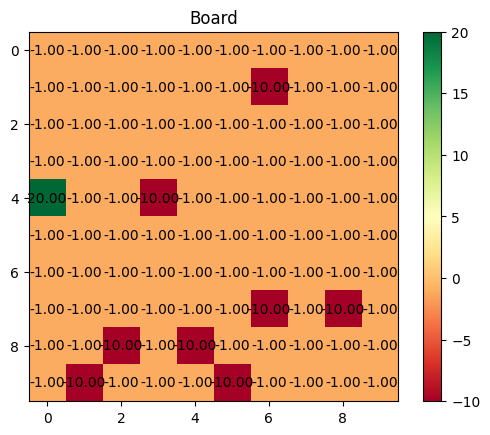

In [14]:
BoardVisualizer.show(test_env.board)

## Understanding the Policy Visualization

The following visualization of the policy for the specified board. We can see the obstacles and the goal states highlighted below. As we are setting are policy to always be 0 in every state, we can see every action at every single state is just moving forward. Ideally, we would see the policy point towards the goal states and away from the obstacles. The algorithms in the following section will find the ideal policy to navigate your agent to the goal while avoiding obstacles.

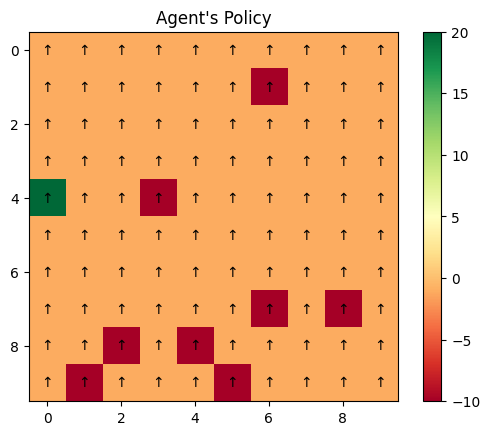

In [15]:
fake_policy = np.zeros_like(test_env.board, dtype=np.int16)
BoardVisualizer.show_policy(test_env.board, fake_policy)

## Understanding the Policy Sanity Tests

Depending on your value function, policies can be correct although slightly different. For example, if the agent's Q-value for moving up or left is the same, we are treating those as equal and will not be penalizing students for slight differences. When reviewing your sanity tests, you will notice an error that looks like:

```bash
AssertionError: Test Policy Iteration 1: Failed 1x2 Board. 
Student Policy Iteration:
[[1 3]
  [1 0]] 
Expected Policy Iteration:
[[[1, 2] [3, 3],
  [0, 0] [0, 3]]]
```

In the above pytest error, you can see that the students policy is incorrect. Notice int he bottom left cell that the student's policy takes action "1" when the expected policy can only move in direction "0" (two values of 0). You can read each of these arrays as corresponding to a specific cell in your proposed policy, where the possible values accepted are in the subarray. If you have furthur questions with debugging and reading errors, contact us on Ed or office hours.

# Implement Value Iteration

## Value Function Helpers
We have implemented the functions below to help you work with getting or setting the write values in a numpy array using the custom `State` object. You may choose to use the functions or not depending with no penalty attributed to your choice.

*Initialize your value function to the reward for each of the board states and update accordingly.*

In [16]:
def get_value_at_state(array: np.array, state: State) -> float:
    """
    Get value from value_function at the specific `state`.

    args:
        array: np.array
        state: State - position to get value at
    """
    return array[state.r, state.c]

def set_value_at_state(array: np.array, state: State, value: float) -> None:
    """
    Set value function at `state` variable to `value`. This modification is IN-PLACE (does not return anything).

    args:
        array: np.array
        state: State - position to modify
        value: float - value to set at `state`

    returns:
        None
    """
    array[state.r, state.c] = value

## Solution

In [17]:
# export - DO NOT MOVE OR MODIFY THIS LINE

def value_iteration(env: Environment, max_iterations: int = 1000, change_margin: float = 1e-5, gamma: float = 0.9):
    """
    Generate the value function mapping state -> Value (scalar). Terminate early if we don't modify
    a mapping more than `change_margin`

    args:
        env: Environment
        max_iterations: int - max number of iterations to compute value function for
        change_margin: float - small number representing minimum change to keep iterating
        gamma: float - discount factor for bellman update

    returns:
        value_function: np.array with updated values
    """
    value_function = env.board.copy()

    ### YOUR CODE BELOW HERE ###

    for iteration in range(max_iterations):
        delta = 0.0
        # create a new copy to hold updated values for this iteration
        new_value_function = value_function.copy()

        # loop through every state in the environment
        for state in env.get_all_states():
            # get all valid actions from the current state
            actions = env.get_possible_actions(state)
            if not actions:  # if no actions are available, skip updating the state
                continue

            best_action_value = -float("inf")
            # Evaluate each possible action
            for action in actions:
                # get the next possible states for the action
                next_states = env.get_next_states(state, action)
                # get the transition probabilities for these outcomes
                probabilities = env.get_transition_dynamics(state, action)
                # immediate rewards for each next state (from the environment's board)
                rewards = env.board[next_states[:, 0], next_states[:, 1]]
                # look up the current estimated value of each next state
                future_values = value_function[next_states[:, 0], next_states[:, 1]]
                # calculate the Q-value for this action using the Bellman update equation:
                # Q(s, a) = sum_{s'} p(s'|s,a) * (reward(s') + gamma * value(s'))
                q_value = np.sum(probabilities * (rewards + gamma * future_values))
                best_action_value = max(best_action_value, q_value)

            # record the change in value for this state
            old_value = value_function[state.r, state.c]
            new_value_function[state.r, state.c] = best_action_value
            delta = max(delta, abs(best_action_value - old_value))
        
        # update the value function after processing all states
        value_function = new_value_function
        # check for convergence: if the maximum change is below the threshold, terminate early
        if delta < change_margin:
            break

    ### YOUR CODE ABOVE HERE ###

    return value_function

## Visual Test

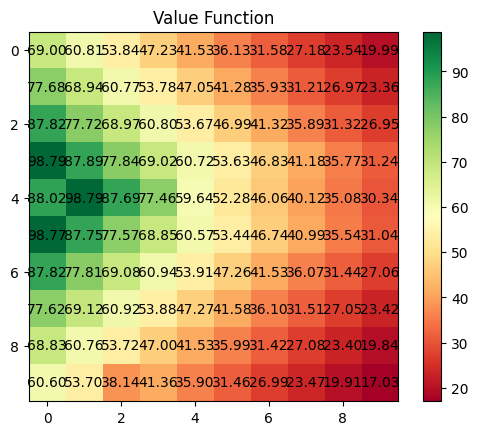

In [18]:
value_function = value_iteration(test_env, max_iterations=50)
BoardVisualizer.show(value_function, title="Value Function")

## Sanity Test Cases

In [19]:
from tests import test_value_iteration_1, test_value_iteration_2

test_value_iteration_1(value_iteration)
test_value_iteration_2(value_iteration)

Test Value Iteration 1 Passed
Test Value Iteration 2 Passed


# Implement Policy Extraction

Develop an algorithm that takes the Value function and finds the ideal next action at each state position.

Ensure your solution is correct and robust against the following modifications. These will be tested:
1. Size of board (change `n_rows` and `n_cols`). Will always be greater than 0.
2. Action mode (`ActionMode.SIMPLE` and `ActionMode.CARDINAL`)

*You may ignore any board rewards when extracting your policy.*

## Solution

In [30]:
# export - DO NOT MOVE OR MODIFY THIS LINE

def extract_policy(value_function: np.array, action_mode: ActionMode) -> np.array:
    """
    Create the policy. This should be a numpy array matrix that maps every state to the optimal action
    based on the inputted value_function. Make sure to handle for both SIMPLE and DIRECTION action modes.

    args:
        value_function: np.array - state -> value function
        action_mode: ActionMode

    returns:
        np.array representing optimal action at every position

    Vectorization Tips.
    - Consider vectorizing the option using the padding numpy operation
    - consider what constant value to compare to, is Q-value bounded on the bottom (hint: np.inf)
    """
    # TODO: return a numpy matrix that is the size of the board which
    # gives the optimal action at each point

    ### YOUR CODE BELOW HERE ###

    # Define the directions based on the action mode.
    try:
        mode = action_mode.value
    except AttributeError:
        mode = action_mode

    if mode == 4:
        directions = np.array([
            [-1, 0],  # Up
            [0, 1],   # Right
            [1, 0],   # Down
            [0, -1]   # Left
        ])
    elif mode == 8:
        directions = np.array([
            [-1,  0],  # North
            [-1,  1],  # Northeast
            [ 0,  1],  # East
            [ 1,  1],  # Southeast
            [ 1,  0],  # South
            [ 1, -1],  # Southwest
            [ 0, -1],  # West
            [-1, -1]   # Northwest
        ])
    else:
        raise ValueError("Unsupported action mode.")

    n_rows, n_cols = value_function.shape
    num_actions = directions.shape[0]
    
    # Initialize an array to hold Q-values for each state and each action.
    Q = np.empty((n_rows, n_cols, num_actions), dtype=float)

    # For each action, compute the shifted value function.
    for a, (dr, dc) in enumerate(directions):
        pad_top = max(0, -dr)
        pad_bottom = max(0, dr)
        pad_left = max(0, -dc)
        pad_right = max(0, dc)
        
        padded = np.pad(
            value_function,
            ((pad_top, pad_bottom), (pad_left, pad_right)),
            mode='constant',
            constant_values=-np.inf
        )
        start_row = pad_top + dr
        start_col = pad_left + dc
        Q[:, :, a] = padded[start_row:start_row+n_rows, start_col:start_col+n_cols]
    
    # The optimal action at each state is the one with the maximum Q-value.
    policy = np.argmax(Q, axis=2)
    # Return as a 2D array to ensure that indexing returns an integer scalar.
    return policy

    ### YOUR CODE ABOVE HERE ###

## Visual Test

Now let's take a look at the policy we have constructed.

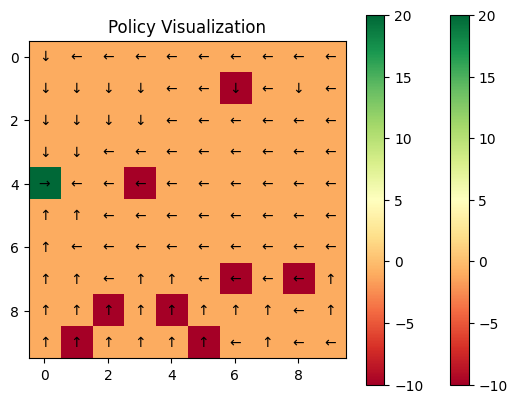

In [31]:
policy = extract_policy(value_function, TEST_action_mode)
BoardVisualizer.show_policy(test_env.board, policy, action_mode=TEST_action_mode, title="Policy Visualization")

## Sanity Test Cases

In [32]:
from tests import test_policy_extraction_1, test_policy_extraction_2

test_policy_extraction_1(extract_policy)
test_policy_extraction_2(extract_policy)

Test Policy Extraction 1 Passed
Test Policy Extraction 2 Passed


# Policy Iteration

Now we will move on to implementing policy iteration. Instead of learning a value function and then extracting a policy, we will learn a policy and value function simultaneously.

Tips:
1. Make sure to wait for your value function to converge before running the the policy extraction section of your code
2. Ensure your policy extraction is considering transition dynamics and reward for taking the corresponding actions

*Initialize your value function to the reward for each of the board states and update accordingly. Initialize your policy to be random (hint - use the `env.action_mode`).*

## Solution

In [33]:
# export - DO NOT MOVE OR MODIFY THIS LINE

def policy_iteration(env: Environment, max_iterations=10_000, gamma=0.9, change_margin: float = 1e-5) -> tuple[np.array, np.array]:
    """
    Implement the policy iteration algorithm. Your algorithm should return both the policy and the value function (although traditionally not needed)

    args:
        env: Environment
        max_iterations: int - maximum number of iterations before terminating
        gamma: float - discount factor
        change_margin: float - maximum change allowed in value function but still continuing to policy improvement
    
    returns:
        tuple[np.array, np.array] - policy, value_function

    Hint: The code you right under the first TODO should be updating the value function and policy one after each other.
    """

    ### YOUR CODE BELOW HERE ###

    # Initialize the value function to the board's rewards.
    value_function = env.board.copy()
    n_rows, n_cols = value_function.shape

    # Initialize policy as a 2D array.
    # For each state, choose a random valid action.
    policy = np.empty((n_rows, n_cols), dtype=int)
    for state in env.get_all_states():
        valid_actions = env.get_possible_actions(state)
        if valid_actions:
            policy[state.r, state.c] = np.random.choice(valid_actions)
        else:
            # Terminal states or states with no valid moves: assign a default (e.g., 0)
            policy[state.r, state.c] = 0

    # Policy iteration loop.
    policy_stable = False
    iteration = 0
    while not policy_stable and iteration < max_iterations:
        iteration += 1

        # Policy Evaluation: update value function until convergence.
        while True:
            delta = 0.0
            new_value_function = value_function.copy()
            for state in env.get_all_states():
                valid_actions = env.get_possible_actions(state)
                if not valid_actions:
                    # No valid action (terminal state), skip update.
                    continue

                # Use the current policy's action for this state.
                a = policy[state.r, state.c]
                next_states = env.get_next_states(state, a)
                probabilities = env.get_transition_dynamics(state, a)
                # Immediate rewards for next states and their current value estimates.
                rewards = env.board[next_states[:, 0], next_states[:, 1]]
                future_values = value_function[next_states[:, 0], next_states[:, 1]]
                # Bellman update for the state under the current policy.
                updated_value = np.sum(probabilities * (rewards + gamma * future_values))
                new_value_function[state.r, state.c] = updated_value
                delta = max(delta, abs(updated_value - value_function[state.r, state.c]))
            value_function = new_value_function
            if delta < change_margin:
                break

        # Policy Improvement: update the policy based on the current value function.
        policy_stable = True
        for state in env.get_all_states():
            valid_actions = env.get_possible_actions(state)
            if not valid_actions:
                continue

            old_action = policy[state.r, state.c]
            best_action = None
            best_q = -float("inf")
            # Evaluate all valid actions from this state.
            for a in valid_actions:
                next_states = env.get_next_states(state, a)
                probabilities = env.get_transition_dynamics(state, a)
                rewards = env.board[next_states[:, 0], next_states[:, 1]]
                future_values = value_function[next_states[:, 0], next_states[:, 1]]
                q_value = np.sum(probabilities * (rewards + gamma * future_values))
                if q_value > best_q:
                    best_q = q_value
                    best_action = a

            # Update the policy for this state.
            policy[state.r, state.c] = best_action
            if best_action != old_action:
                policy_stable = False

        # If no policy changed, then we have converged.
        if policy_stable:
            break

    return policy, value_function    

    ### YOUR CODE ABOVE HERE ###

## Visual Test

In [34]:
test_policy, test_value_function = policy_iteration(test_env, max_iterations=5)

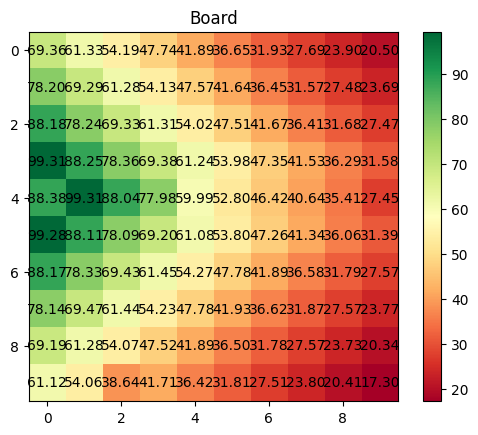

In [35]:
BoardVisualizer.show(test_value_function)

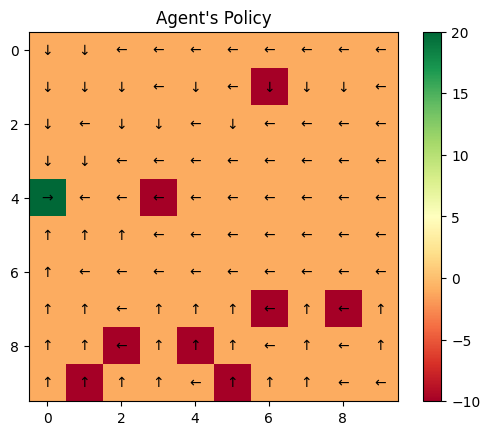

In [36]:
BoardVisualizer.show_policy(test_env.board, test_policy, ActionMode.SIMPLE)

## Sanity Test Cases

In [37]:
from tests import test_policy_iteration_1, test_policy_iteration_2

test_policy_iteration_1(policy_iteration)
test_policy_iteration_2(policy_iteration)

Test Policy Iteration 1 Passed
Test Policy Iteration 2 Passed


# Grading

Grading will evaluate all 3 functions:
- `value_iteration`: 15 points, 5 hidden tests
- `policy_extraction`: 10 points, 5 hidden tests
- `policy_iteration`: 15 points, 5 hidden tests

We will test `value_iteration` and `policy_iteration` on the following environment variables. Please be sure you thouroughly test your algorithms to make sure they output the correct answer with any combination of variables.

1. Size of board (change `n_rows` and `n_cols`). This will always be greater than 0.
2. Action mode (`ActionMode.SIMPLE` and `ActionMode.CARDINAL`).
3. Discrete or Continuous Rewards.
4. Number of Obstacles or Goals (i.e. `obstacle_count=10, goal_count=1`). Every board we test will have a non-negative number of obstacles and a non-negative number of goals.
5. Reward values for obstacles and goals (i.e. `obstacle_value=-10, goal_value=20`). Obstacle values will always be negative and goals will always be positive.

`policy_extraction` will be evaluated using the following environment variables. We will be supplying our own value functions to your implementation and seeing if it obtains the correct policy.

1. Size of board (change `n_rows` and `n_cols`). Will always be greater than 0.
2. Action mode (`ActionMode.SIMPLE` and `ActionMode.CARDINAL`)

Maximum total points: 40


Grading will be conducted by visual inspection and by use of autograder. The autograder will display "sanity checks", which reflect the unit tests that we have provided you in this notebook. We will test your code on various configurations, outlined above, to determine your final score. You have the ability to modify the environment variables to test your code on different configurations, and we encourage you to do so to gain a better understanding of the problem and your solution!

We will also visually inspect the entire notebook to check if your implementations include details that are inconsistent with the assignment (e.g., hard-coding values or actions to pass tests) and to make sure no cells were altered to provide unearned grading results.

# Submission

Upload this notebook with the name `submission.ipynb` file to Gradescope. The autograder will **only** run successfully if your file is named this way. You must ensure that you have removed all print statements from **your** code, or the autograder may fail to run. Excessive print statements will also result in muddled test case outputs, which makes it more difficult to interpret your score. 

We've added appropriate comments to the top of certain cells for the autograder to export (`# export`). You do NOT have to do anything (e.g. remove print statements) to cells we have provided - anything related to those have been handled for you. You are responsible for ensuring your own code has no syntax errors or unnecessary print statements. You ***CANNOT*** modify the export comments at the top of the cells, or the autograder will fail to run on your submission.

You should ***not*** add any cells that your code requires to the notebook when submitting. You're welcome to add any code as you need to extra cells when testing, but they will not be graded. Only the provided cells will be graded. As mentioned in the top of the notebook, **any helper functions that you add should be nested within the function that uses them.**

If you encounter any issues with the autograder, please feel free to make a post on Ed Discussion. We highly recommend making a public post to clarify any questions, as it's likely that other students have the same questions as you! If you have a question that needs to be private, please make a private post.